## learning-AI101 : PAMAP classification (DL)
### PAMAP (Physical Activity Monitoring) 데이터를 1D-CNN 방식의 classification (시계열 데이터)

<br>

- **임규연 (lky473736)**
- 2024.09.03. ~ 2024.09.08.에 문서 작성
- **dataset** : https://archive.ics.uci.edu/dataset/231/pamap2+physical+activity+monitoring
- **data abstract** : The PAMAP2 Physical Activity Monitoring dataset contains data of 18 different physical activities (such as walking, cycling, playing soccer, etc.), performed by 9 subjects wearing 3 inertial measurement units and a heart rate monitor. The dataset can be used for activity recognition and intensity estimation, while developing and applying algorithms of data processing, segmentation, feature extraction and classification.
------



## <span id='dl'><mark>DL</mark></span>
    
deep learning으로 PAMAP을 classification한다. 1D-CNN을 이용한다.

- **Reference** 
    - https://github.com/MyungKyuYi/HAR/blob/main/PAMAP_CNN.ipynb
    - https://archive.ics.uci.edu/dataset/231/pamap2+physical+activity+monitoring
    - https://github.com/andreasKyratzis/PAMAP2-Physical-Activity-Monitoring-Data-Analysis-and-ML/blob/master/pamap2.ipynb
    - https://github.com/graphicst/AI-Study/blob/main/PaperWork/PAMAP/PAMAP_CNN_240306.ipynb 

In [570]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy
import seaborn as sns

In [571]:
# data load

df = pd.read_csv("../../data/PAMAP/PAMAP_features.csv")
df

,Unnamed: 0,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
0,3006,2,17,light,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
1,3497,2,4,moderate,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
2,14495,7,5,vigorous,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
3,13278,7,17,light,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
4,14969,8,3,light,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11768,10708,6,2,light,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
11769,4870,3,2,light,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11770,11822,6,4,moderate,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
11771,3866,2,7,moderate,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [572]:
# 각 feature의 이름 
# https://archive.ics.uci.edu/ml/machine-learning-databases/00231/readme.pdf

features_name = {0: 'transient', 1:'lying', 2:'sitting', 3:'standing',
              4:'walking', 5:'running', 6:'cycling', 7:'Nordic walking',
              9:'watching TV', 10:'computer work', 11:'car driving',
              12:'ascending stairs', 13:'descending stairs', 16:'vacuum cleaning',
              17:'ironing', 18:'folding laundry', 19:'house cleaning',
              20:'playing soccer', 24:'rope jumping'}

print (features_name)
print ()
df.info()

{0: 'transient', 1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking', 5: 'running', 6: 'cycling', 7: 'Nordic walking', 9: 'watching TV', 10: 'computer work', 11: 'car driving', 12: 'ascending stairs', 13: 'descending stairs', 16: 'vacuum cleaning', 17: 'ironing', 18: 'folding laundry', 19: 'house cleaning', 20: 'playing soccer', 24: 'rope jumping'}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11773 entries, 0 to 11772
Data columns (total 68 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11773 non-null  int64  
 1   sub_id            11773 non-null  int64  
 2   activity_id       11773 non-null  int64  
 3   act_level         11773 non-null  object 
 4   hr_mean           11773 non-null  float64
 5   hr_mean_normal    11773 non-null  float64
 6   hr_std            11773 non-null  float64
 7   hr_std_normal     11773 non-null  float64
 8   hand_tmp_mean     11773 non-null  float64
 9   hand_tmp_std   

In [573]:
# 필요없는 열 제거

df = df.drop(['Unnamed: 0',
              'sub_id',
              'act_level',
              'hr_mean',
              'hr_mean_normal',
              'hr_std',
              'hr_std_normal'], axis = 1)

# PAMAP_input = df.drop(['activity_id'], axis = 1) 
# PAMAP_target = df['activity_id'] # activity_id를 예측하는 문제

# print (PAMAP_input.shape, PAMAP_target.shape)

In [574]:
# target에 포함된 요소들 확인하기

print (df['activity_id'].unique())


'''
    label이 0-based가 아니기 때문에 0-based로 바꾸어야 할 듯 하다.
    (labelencoding)
'''

[17  4  5  3  6  2  7 16 12  1 13 24]


'\n    label이 0-based가 아니기 때문에 0-based로 바꾸어야 할 듯 하다.\n    (labelencoding)\n'

In [575]:
# label encoding을 진행한다.

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['activity_id'] = LE.fit_transform(df['activity_id'])

df

,activity_id,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,hand_acc_z_mean,hand_acc_z_std,hand_gyr_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
0,10,34.375000,0.000000,-1.165524,2.383779,3.381285,2.582771,8.492507,1.224852,0.093030,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
1,3,31.875000,0.000000,-12.040995,3.734766,3.069947,2.591651,1.161251,1.837110,0.055998,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
2,4,32.500000,0.000000,-3.723040,10.188184,11.705779,17.220389,-1.367870,4.527840,0.186308,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
3,10,33.812500,0.000000,-3.618932,1.935690,0.542981,2.907890,8.430229,0.975924,-0.163251,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
4,2,34.437500,0.000000,-9.275877,0.082824,1.006239,0.153816,2.709588,0.155286,-0.008753,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11768,1,33.525635,0.030741,-4.306831,0.087374,1.634235,0.082474,8.393767,0.110314,-0.003882,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
11769,1,32.083130,0.029390,-1.545991,0.086820,3.379703,0.093813,8.981813,0.103787,-0.011143,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11770,3,31.750000,0.000000,-10.034760,1.780491,3.100475,1.319988,1.092313,0.994165,0.060559,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
11771,6,30.465576,0.031088,-8.275569,3.245008,6.196727,4.417230,2.372815,1.843274,0.081074,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


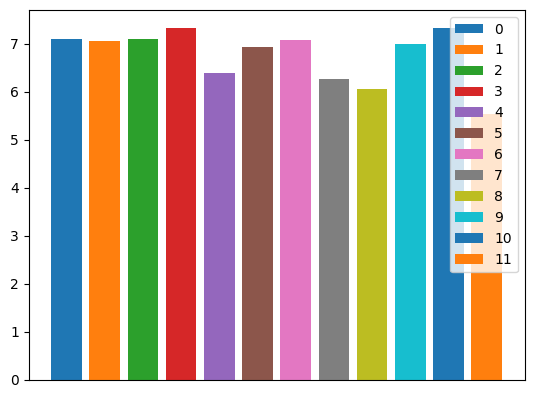

activity_id
10    1539
3     1525
2     1220
0     1203
6     1196
1     1162
9     1099
5     1035
4      593
7      522
8      428
11     251
Name: count, dtype: int64


In [576]:
# activity_id의 countplot, value_count

import math

target = np.unique(df['activity_id'])

# 시각화 진행

width = 1
for compo in target : 
    plt.bar(width, math.log(len(df[df['activity_id'] == compo])), 
            label=compo)
    width += 1
    
plt.xticks([], [])

plt.legend()
plt.show()

print (df['activity_id'].value_counts())

In [577]:
# Z-score normalization을 진행한다.

from sklearn.preprocessing import StandardScaler

X = df[[feature_name for feature_name in df.columns if feature_name != 'activity_id']]
y = df['activity_id']

SS = StandardScaler()
X = SS.fit_transform(X)

scaled_df = pd.DataFrame(data=X, 
                        columns = [feature_name for feature_name in df.columns if feature_name != 'activity_id'])
scaled_df['activity_id'] = y

scaled_df 

,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,hand_acc_z_mean,hand_acc_z_std,hand_gyr_x_mean,hand_gyr_x_std,...,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor,activity_id
0,0.906391,-0.882330,0.794080,-0.189977,-0.045566,-0.178241,1.573033,-0.463362,0.353393,-0.353461,...,-0.943103,0.713250,-0.692812,-1.126229,-1.788009,1.037790,-0.615626,0.083811,-2.155291,10
1,-0.485654,-0.882330,-1.529294,0.255038,-0.117174,-0.176231,-0.847440,-0.090604,0.207085,1.398970,...,-0.382405,-0.506400,-1.061178,0.275135,-1.846476,0.118200,-1.656592,-1.238058,1.168066,3
2,-0.137643,-0.882330,0.247707,2.380797,1.869062,3.136292,-1.682450,1.547578,0.721926,2.005533,...,-0.316390,1.767528,0.136323,0.200490,-0.392753,-0.175993,-1.678015,-0.981551,1.202851,4
3,0.593181,-0.882330,0.269948,-0.337578,-0.698374,-0.104622,1.552471,-0.614915,-0.659150,-0.617608,...,-0.108073,0.671155,-0.701971,1.545344,0.237215,0.401716,-0.231395,0.572388,-2.448536,10
4,0.941193,-0.882330,-0.938570,-0.947913,-0.591825,-0.728253,-0.336245,-1.114539,-0.048743,-1.169156,...,0.303341,0.347199,1.538175,-1.044745,0.521390,-0.129311,-0.481296,0.225730,0.091672,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11768,0.433449,1.504662,0.122989,-0.946414,-0.447387,-0.744407,1.540433,-1.141920,-0.029498,-1.194200,...,-0.584086,0.369190,-0.030657,1.079907,-0.261687,-1.431140,0.001888,0.088277,0.007700,1
11769,-0.369764,1.399736,0.712799,-0.946596,-0.045930,-0.741840,1.734581,-1.145894,-0.058186,-1.195850,...,0.659690,0.007887,0.532625,-0.722263,0.271271,-0.491254,0.272623,-0.064722,-0.064051,1
11770,-0.555257,-0.882330,-1.100693,-0.388700,-0.110152,-0.464185,-0.870201,-0.603810,0.225103,0.426059,...,2.063433,-2.061279,-1.289649,-0.563293,1.470427,0.273480,-1.364945,-0.808522,0.109486,3
11771,-1.270447,1.531609,-0.724870,0.093712,0.601984,0.237152,-0.447433,-0.086851,0.306157,0.048274,...,0.040554,-0.752064,-0.538219,0.109485,-1.054003,0.006201,-1.954721,-1.182490,1.314118,6


In [578]:
# train, test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_df, 
                                                    scaled_df['activity_id'],
                                                    test_size = 0.2)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9418, 61) (2355, 61) (9418,) (2355,)


In [579]:
#TIME_STEPS : The length of the time segment.
#STEP : Determines the amount of overlap between two consecutive time segments.
    
TIME_STEPS = 100 # 100Hz
STEP = 5

In [580]:
# from scipy import stats

# def create_dataset(X, y, time_steps=1, step=1) :
#     Xs, ys = [], []
    
#     for i in range(0, len(X) - time_steps, step) :
#         v = X.iloc[i:(i + time_steps)].values
#         labels = y.iloc[i: i + time_steps]
#         Xs.append(v)     
#         '''
#             이 부분을 조금 수정.
#             만약 mode_label이 배열일 경우 정확한 index를 가리키도록 수정
#         '''
#         # ys.append(stats.mode(labels)[0][0]) # mode
        
#         mode_label = stats.mode(labels)[0]  # 첫 번째 값이 모드
#         if isinstance(mode_label, np.ndarray) :
#             mode_label = mode_label[0]  # 배열이면 첫 번째 값 선택
        
#     return np.array(Xs), np.array(ys).reshape(-1, 1)


from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)


'''
    시계열 데이터로 만들기 위함 
    split_sequence의 한 종류, 
    mode를 이용하여 가장 많이 나온 label로 결정
'''

'\n    시계열 데이터로 만들기 위함 \n    split_sequence의 한 종류, \n    mode를 이용하여 가장 많이 나온 label로 결정\n'

In [581]:
'''
    시계열 데이터로 만들기 위함 
    split_sequence의 한 종류
'''

X_train, y_train = create_dataset(X_train[[feature_name for feature_name in scaled_df.columns if feature_name != 'activity_id']], 
                                  X_train['activity_id'], 
                                  TIME_STEPS,
                                  STEP)

X_test, y_test = create_dataset(X_test[[feature_name for feature_name in scaled_df.columns if feature_name != 'activity_id']], 
                                X_test['activity_id'],
                               TIME_STEPS,
                               STEP)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1864, 100, 60), (451, 100, 60), (1864, 1), (451, 1))

In [582]:
# ont-hot encoding을 진행한다. (categorical crossentropy)

# print(np.unique(y_train))  # y_train에 있는 고유한 값들을 출력
# print(np.unique(y_test))  # y_test에 있는 고유한 값들을 출력

print ("prev : ", y_train.shape, y_test.shape)

from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
OE = OneHotEncoder(sparse_output=False)

y_train_onehot = OE.fit_transform(y_train)
y_test_onehot = OE.transform(y_test)

print("after one-hot encoding: ", y_train_onehot.shape, y_test_onehot.shape)

prev :  (1864, 1) (451, 1)
after one-hot encoding:  (1864, 8) (451, 8)


In [583]:
verbose, epochs, batch_size = 1, 100, 32 
# 모든 프로세서 병렬 사용, epoch 100, batch_size 32로 세팅

n_timesteps = X_train.shape[1]
n_features = X_train.shape[2]
n_outputs = y_train_onehot.shape[1]
print (n_timesteps, n_features, n_outputs)

100 60 8


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_74 (Conv1D)              │ (None, 50, 64)         │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_43 (MaxPooling1D) │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_75 (Conv1D)              │ (None, 25, 96)         │        18,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_44 (MaxPooling1D) │ (None, 12, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 12, 96)         │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 12, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 32)             │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,464 (294.78 KB)

 Trainable params: 75,208 (293.78 KB)

 Non-trainable params: 256 (1.00 KB)

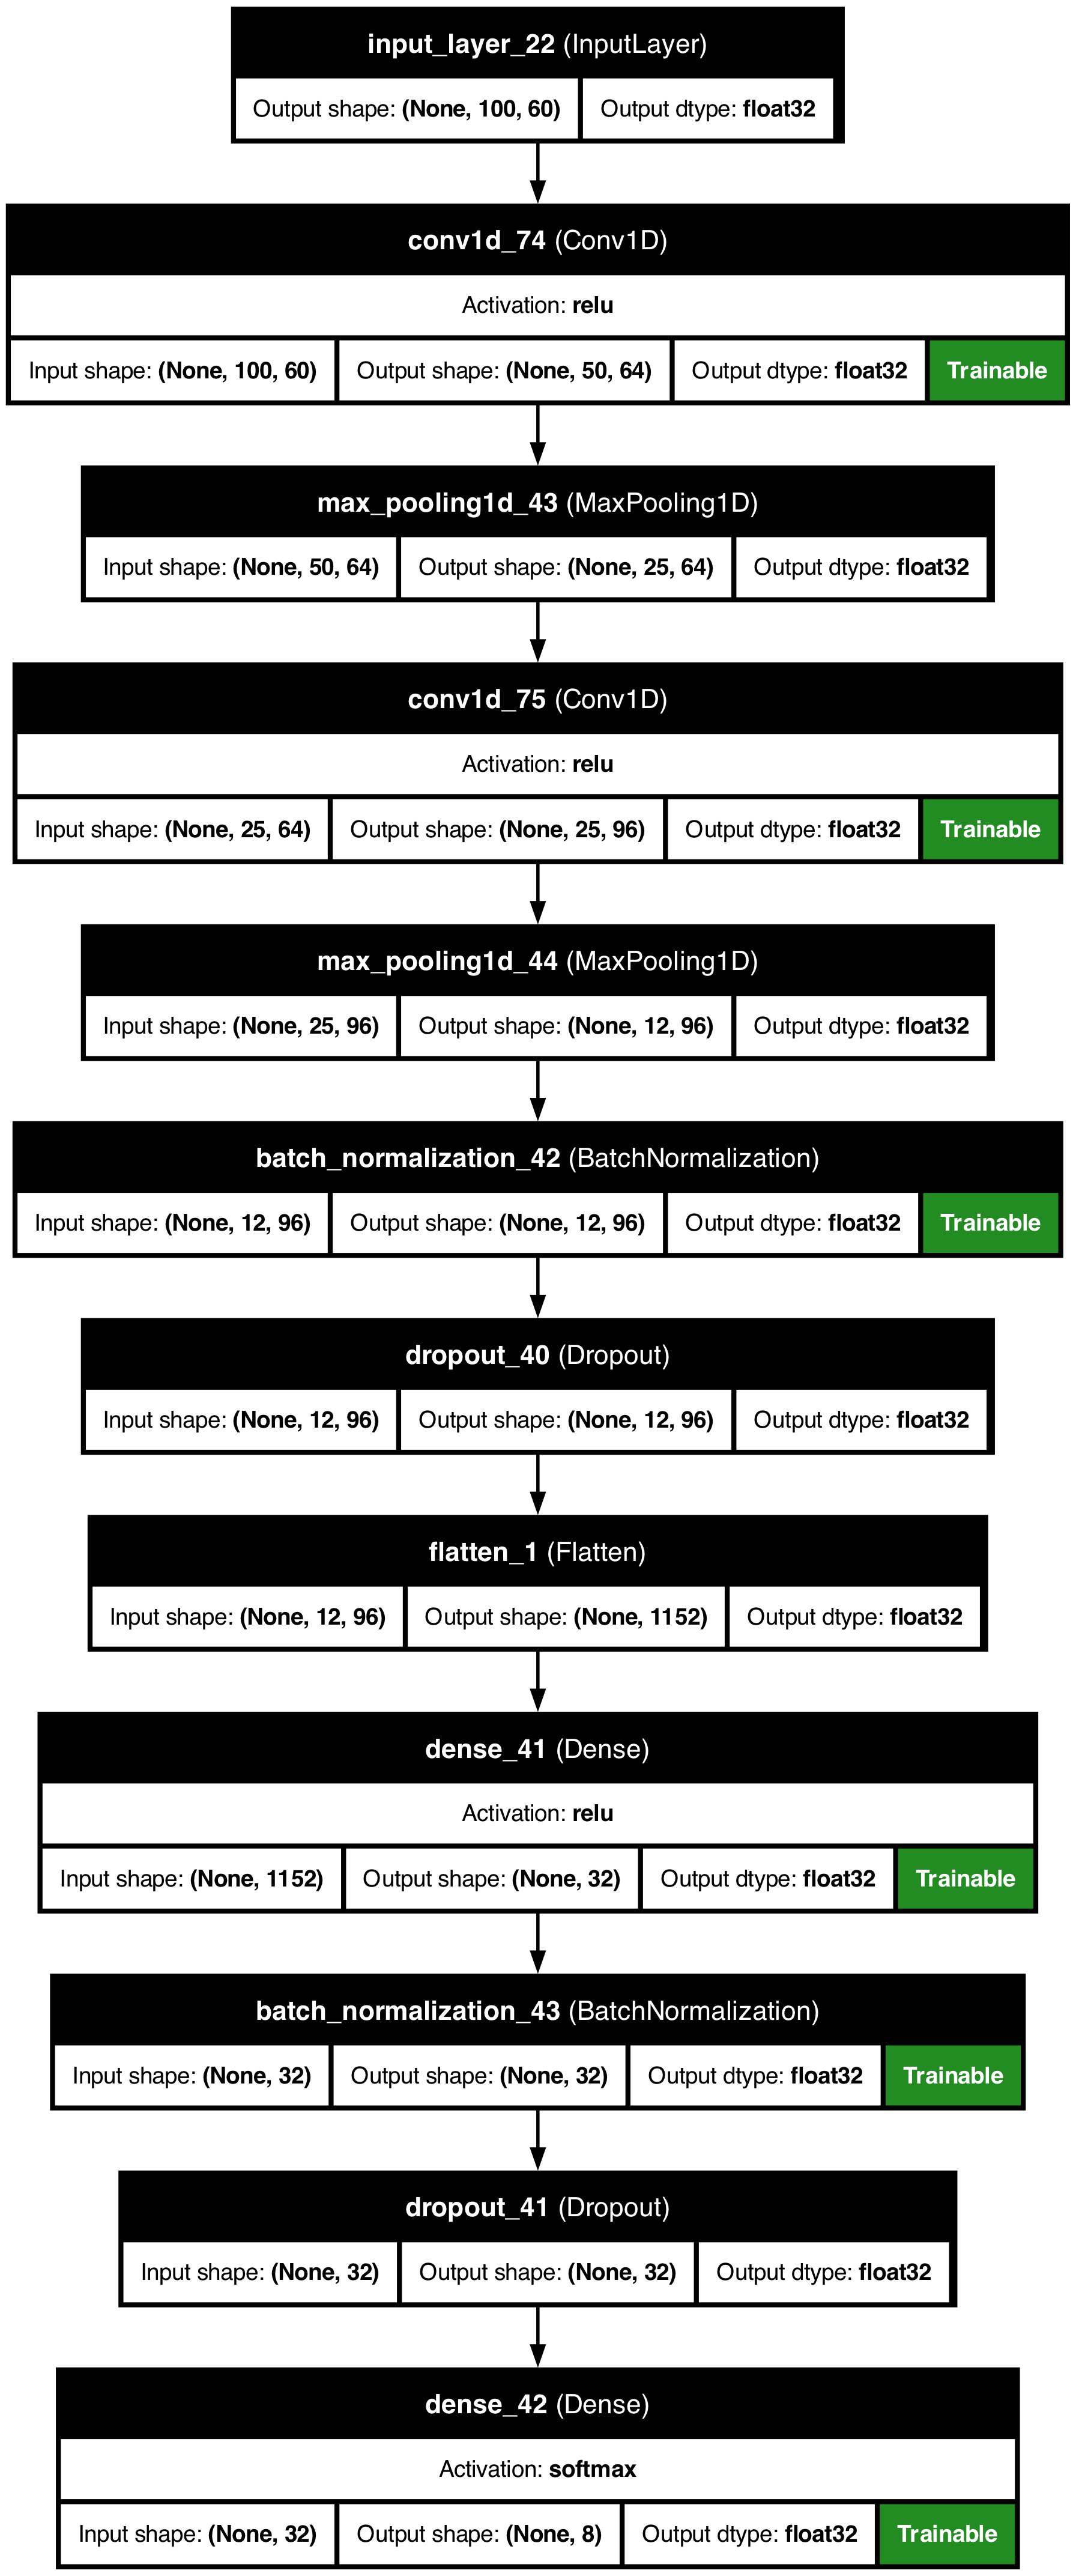

In [584]:
# modeling

import tensorflow as tf

# input
inputs = tf.keras.Input(shape=(n_timesteps, n_features))

# 첫 번째 Conv 블록 (Conv + MaxPooling)
conv_1 = tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=2, 
                                activation='relu', padding='same')(inputs)
maxpool_1 = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(conv_1)

# 두 번째 Conv 블록 (Conv + MaxPooling)
conv_2 = tf.keras.layers.Conv1D(filters=96, kernel_size=3, strides=1, 
                                activation='relu', padding='same')(maxpool_1)
maxpool_2 = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(conv_2)

# Batch Normalization
batch_norm = tf.keras.layers.BatchNormalization()(maxpool_2)

# Dropout (overfitting 방지)
dropout = tf.keras.layers.Dropout(0.5)(batch_norm)

# Dense
flat = tf.keras.layers.Flatten()(dropout)
dense_1 = tf.keras.layers.Dense(32, activation='relu')(flat)
dense_1 = tf.keras.layers.BatchNormalization()(dense_1)
dense_1 = tf.keras.layers.Dropout(0.5)(dense_1)

# output
output = tf.keras.layers.Dense(n_outputs, activation='softmax')(dense_1)

model = tf.keras.Model(inputs=inputs, outputs=output)


model.summary()
tf.keras.utils.plot_model(model,
                         show_dtype=True,
                         show_layer_activations=True,
                         show_layer_names=True,
                         show_shapes=True,
                         show_trainable=True)

In [585]:
# compiling

model.compile(optimizer='Adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [586]:
history = model.fit(X_train, y_train_onehot, 
                    epochs = epochs, 
                    batch_size = batch_size,
                    validation_split = 0.2, 
                    shuffle = True)
print(model.summary())

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1521 - loss: 3.0825 - val_accuracy: 0.2198 - val_loss: 1.9770
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2375 - loss: 2.3607 - val_accuracy: 0.2520 - val_loss: 1.9766
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3615 - loss: 1.8850 - val_accuracy: 0.3271 - val_loss: 1.8412
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4653 - loss: 1.5747 - val_accuracy: 0.3512 - val_loss: 1.8104
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5417 - loss: 1.3710 - val_accuracy: 0.4075 - val_loss: 1.6985
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6055 - loss: 1.2091 - val_accuracy: 0.3941 - val_loss: 1.7152
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6481 - loss: 1.1145 - val_accuracy: 0.4075 - val_loss: 1.7519
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6716 - loss: 1.0078 - val_accuracy: 0.

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_74 (Conv1D)              │ (None, 50, 64)         │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_43 (MaxPooling1D) │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_75 (Conv1D)              │ (None, 25, 96)         │        18,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_44 (MaxPooling1D) │ (None, 12, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 12, 96)         │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 12, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 32)             │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,882 (882.36 KB)

 Trainable params: 75,208 (293.78 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 150,418 (587.57 KB)

None


{'accuracy': [0.14553990960121155, 0.2541918158531189, 0.37223339080810547, 0.46411803364753723, 0.5506371855735779, 0.6002683043479919, 0.635814905166626, 0.6686787605285645, 0.706908106803894, 0.706908106803894, 0.7330650687217712, 0.7451375126838684, 0.775989294052124, 0.7826961874961853, 0.794097900390625, 0.8101944923400879, 0.8457410931587219, 0.8370221257209778, 0.863179087638855, 0.8651911616325378, 0.8752515316009521, 0.8913480639457703, 0.8900067210197449, 0.895372211933136, 0.912810206413269, 0.9054325819015503, 0.9148222804069519, 0.9302481412887573, 0.9161636233329773, 0.9302481412887573, 0.9382964372634888, 0.9322602152824402, 0.9403085112571716, 0.9463447332382202, 0.9443326592445374, 0.9490274786949158, 0.9463447332382202, 0.9496982097625732, 0.9463447332382202, 0.9637826681137085, 0.9376257658004761, 0.9510395526885986, 0.9496982097625732, 0.9564051032066345, 0.9604292511940002, 0.9483568072319031, 0.9577465057373047, 0.9691482186317444, 0.9704896211624146, 0.957075774

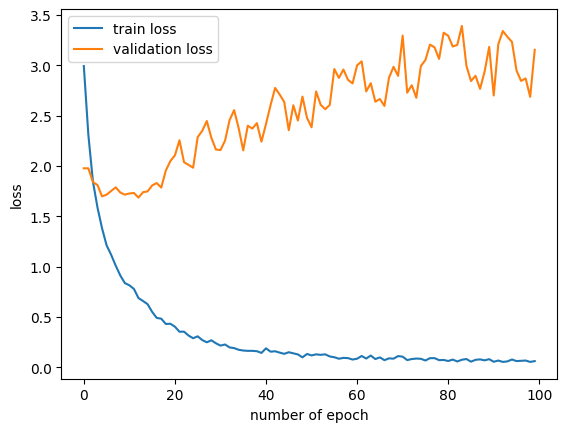

In [587]:
# history 그리고 loss 시각화

print (history.history)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend (['train loss', 'validation loss'])
plt.show() 

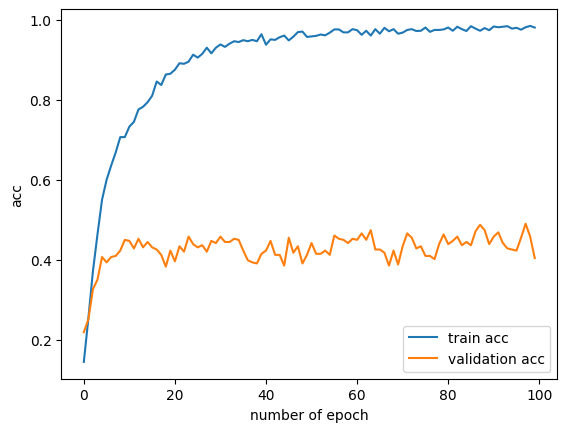

In [589]:
# accuracy 시각화

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('number of epoch')
plt.ylabel('acc')
plt.legend (['train acc', 'validation acc'])
plt.show() 

In [592]:
# evaulate

model.evaluate (X_test, y_test_onehot)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4388 - loss: 2.8686


[2.686079740524292, 0.47228381037712097]

In [595]:
# classification report

from sklearn.metrics import classification_report

pred_classes = pred.argmax(axis=1)  # Get the class with the highest probability
print(classification_report(y_test, pred_classes))

              precision    recall  f1-score   support

           0       0.61      0.17      0.27        65
           1       0.17      0.05      0.07        43
           2       0.14      0.03      0.06        29
           3       0.56      0.77      0.65       136
           4       0.00      0.00      0.00         0
           5       0.04      0.60      0.08         5
           6       0.00      0.00      0.00        39
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00       132

    accuracy                           0.27       451
   macro avg       0.15      0.16      0.11       451
weighted avg       0.28      0.27      0.25       451



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr